In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = []
with open("mvs_interstellar.csv") as file:
    lines = file.readlines()
    start = False

    for i, line in enumerate(lines):
        if (
            not start
            and "framenum,source,blockw,blockh,srcx,srcy,dstx,dsty,flags"
            not in line
        ):
            start = True
            continue
        arr.append(line.rstrip("\n").split(","))

In [3]:
df = pd.DataFrame(arr[1:], columns=arr[0])

In [4]:
w, h = 1920, 1080

df["srcx"] = pd.to_numeric(df["srcx"])
df["srcy"] = pd.to_numeric(df["srcy"])
df["dstx"] = pd.to_numeric(df["dstx"])
df["dsty"] = pd.to_numeric(df["dsty"])
df["blockw"] = pd.to_numeric(df["blockw"])
df["blockh"] = pd.to_numeric(df["blockh"])
df["framenum"] = pd.to_numeric(df["framenum"])

In [5]:
df.head()

,framenum,source,blockw,blockh,srcx,srcy,dstx,dsty,flags
0,1,-1,16,16,24,8,24,8,0x0
1,1,-1,16,16,40,8,40,8,0x0
2,1,-1,16,16,56,8,56,8,0x0
3,1,-1,16,16,72,8,72,8,0x0
4,1,-1,16,16,88,8,88,8,0x0


In [6]:
df["mag"] = (((df["srcx"] - df["dstx"]) ** 2 + (df["srcy"] - df["dsty"]) ** 2) ** 0.5) / np.hypot(w, h)

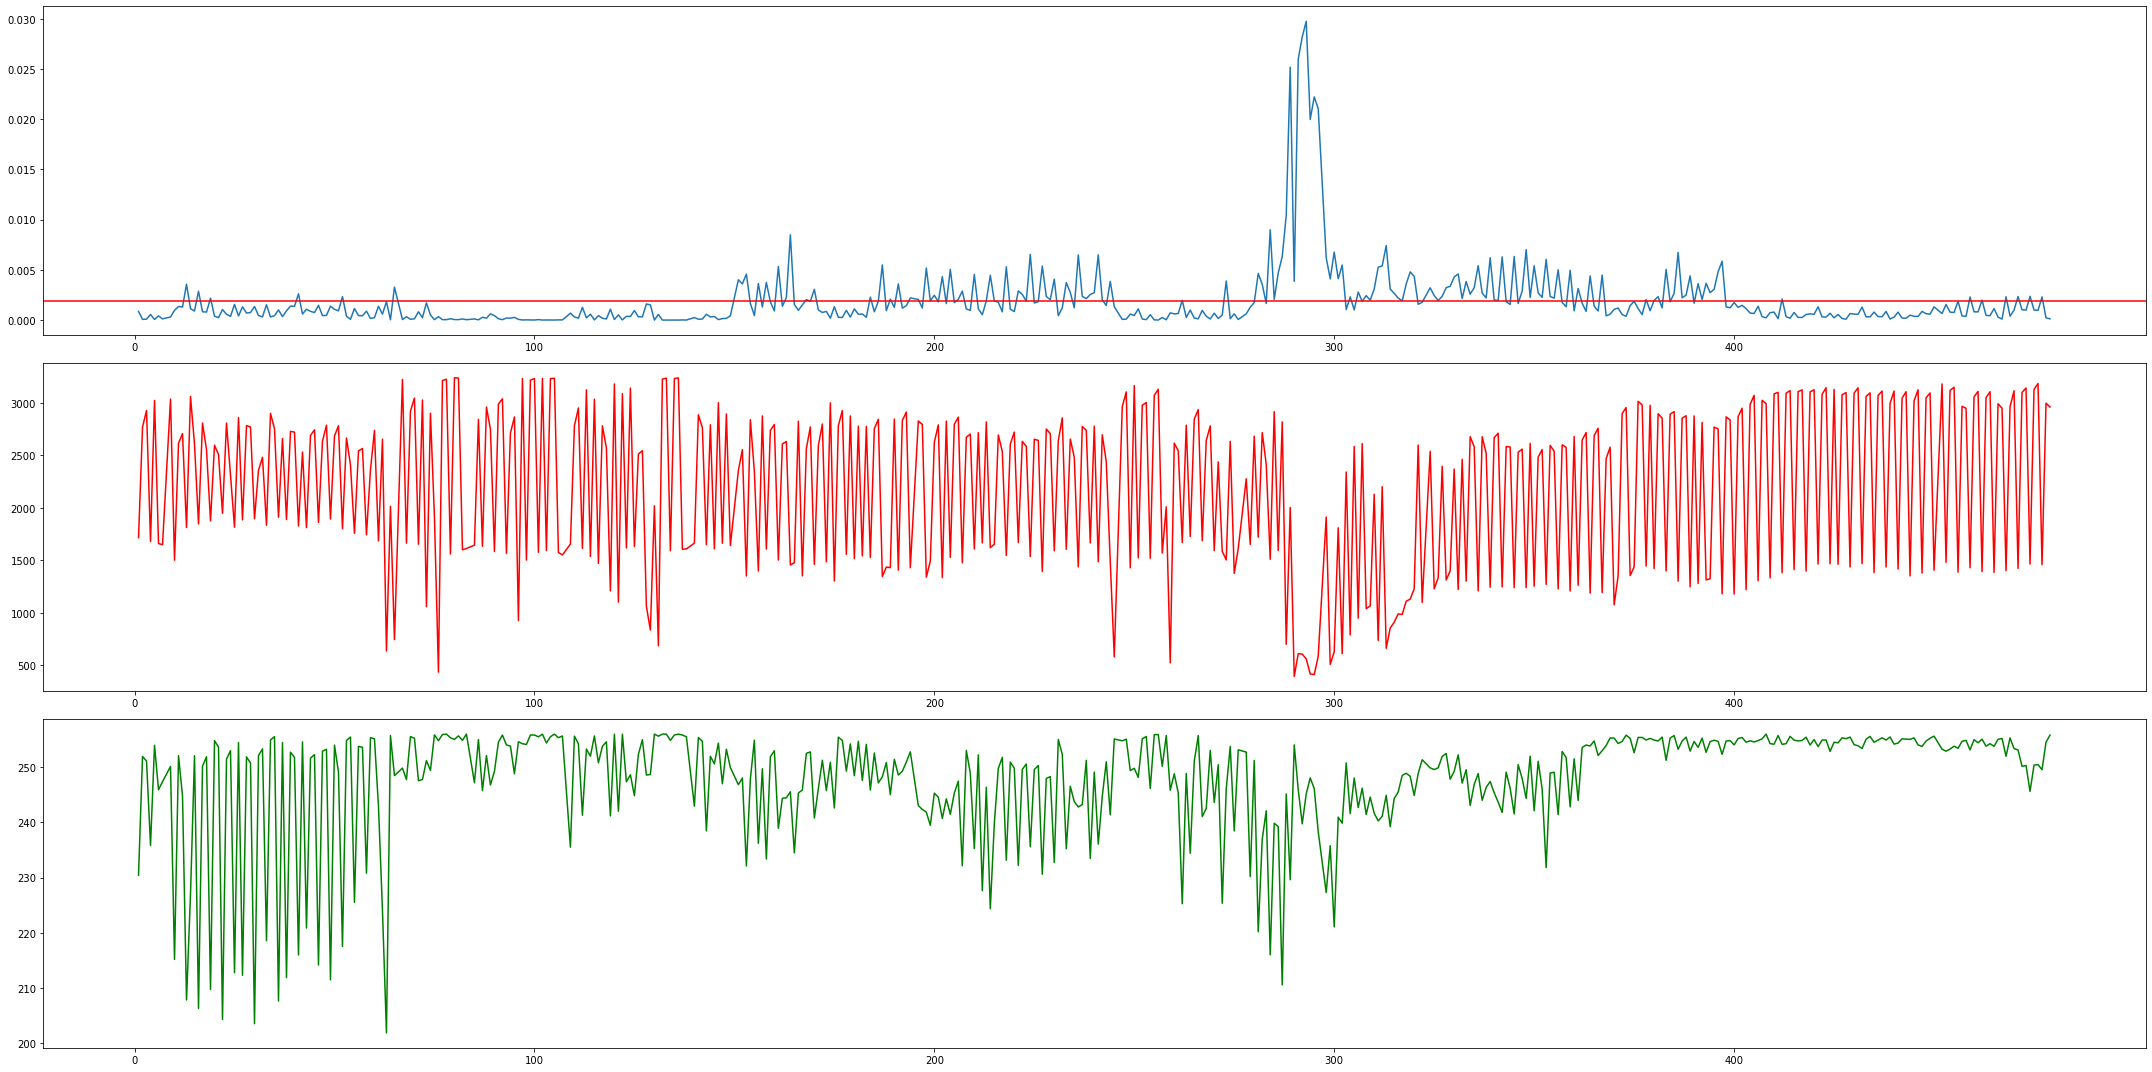

In [7]:
frames = df.groupby(["framenum"]).mean()
frames["count"] = df.groupby(["framenum"]).count()["source"]
frames["macro"] = frames["blockw"] * frames["blockh"]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 15))

ax1.plot(frames["mag"])
ax1.axhline(frames["mag"].mean(), c="r")
ax1.set_xticks(np.arange(0, len(frames["mag"]), 100))
ax2.plot(frames["count"], c="r")
ax2.set_xticks(np.arange(0, len(frames["mag"]), 100))
ax3.plot(frames["macro"], c="g")
ax3.set_xticks(np.arange(0, len(frames["mag"]), 100))

fig.tight_layout()
plt.show()